In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
%matplotlib inline
import pprint

# tensorflow関連
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

# 自作モジュール
import models.mini_net as mini_net
import models.resnet_transfer as resnet_transfer
import scripts.visualization as visualization

## Configuration

In [2]:
CLASSES = ['unripe', 'ripe', 'overripe']
NUM_CLASSES = len(CLASSES)

# データセットディレクトリ
TRAIN_DATA_DIR = './dataset/train'
VALIDATION_DATA_DIR = './dataset/val'

# データセット画像数
nb_train_samples = 150
nb_validation_samples = 20

# 入力画像サイズ
IMG_WIDTH, IMG_HEIGHT = 224, 224

# 学習回数
EPOCHS = 50
BATCH_SIZE = 32

## Dataset (Augumentation)

In [3]:
# データ拡張パラメータ (訓練画像)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    color_mode='rgb',
    classes=CLASSES,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 360 images belonging to 3 classes.


In [8]:
# データ拡張パラメータ (検証用)
validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    color_mode='rgb',
    classes=CLASSES,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 90 images belonging to 3 classes.


## Model

In [9]:
# model定義    
model = mini_net.get_model(IMG_WIDTH, IMG_HEIGHT, NUM_CLASSES)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 128)       0   

In [10]:
# 学習方法の設定
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)

## CallBacks

In [11]:
# チェックポイント用のコールバック
checkpoint = ModelCheckpoint(
                    filepath="weights/checkpoint-{epoch:02d}-{val_loss:.2f}.hdf5",
                    monitor='val_loss',
                    save_best_only=True,
                    save_freq=10
)

## Train

In [12]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples,
        #callbacks=[checkpoint]
)

Epoch 1/50
150/150 [==============================] - 59s 393ms/step - loss: 2.8047 - accuracy: 0.3761 - val_loss: 1.0383 - val_accuracy: 0.3560
Epoch 2/50
150/150 [==============================] - 58s 385ms/step - loss: 0.9765 - accuracy: 0.5784 - val_loss: 0.9401 - val_accuracy: 0.5464
Epoch 3/50
150/150 [==============================] - 55s 367ms/step - loss: 0.7716 - accuracy: 0.6488 - val_loss: 0.6508 - val_accuracy: 0.6325
Epoch 4/50
150/150 [==============================] - 57s 383ms/step - loss: 0.7782 - accuracy: 0.6746 - val_loss: 0.6404 - val_accuracy: 0.6474
Epoch 5/50
150/150 [==============================] - 55s 368ms/step - loss: 0.6840 - accuracy: 0.6878 - val_loss: 0.6267 - val_accuracy: 0.7070
Epoch 6/50
150/150 [==============================] - 57s 381ms/step - loss: 1.6808 - accuracy: 0.6711 - val_loss: 0.5906 - val_accuracy: 0.7268
Epoch 7/50
150/150 [==============================] - 56s 372ms/step - loss: 0.6686 - accuracy: 0.7230 - val_loss: 0.5910 - val_ac

## Visualization

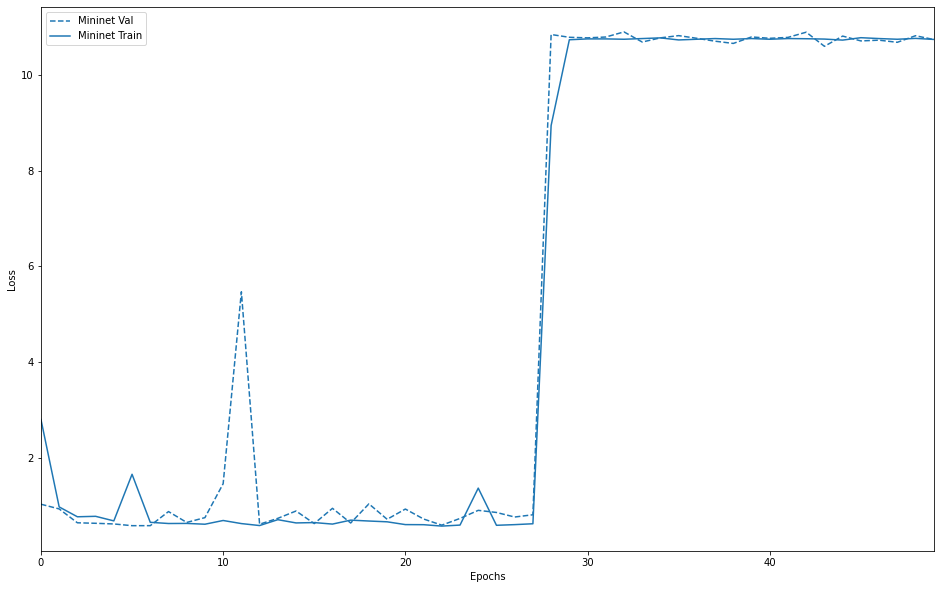

<Figure size 432x288 with 0 Axes>

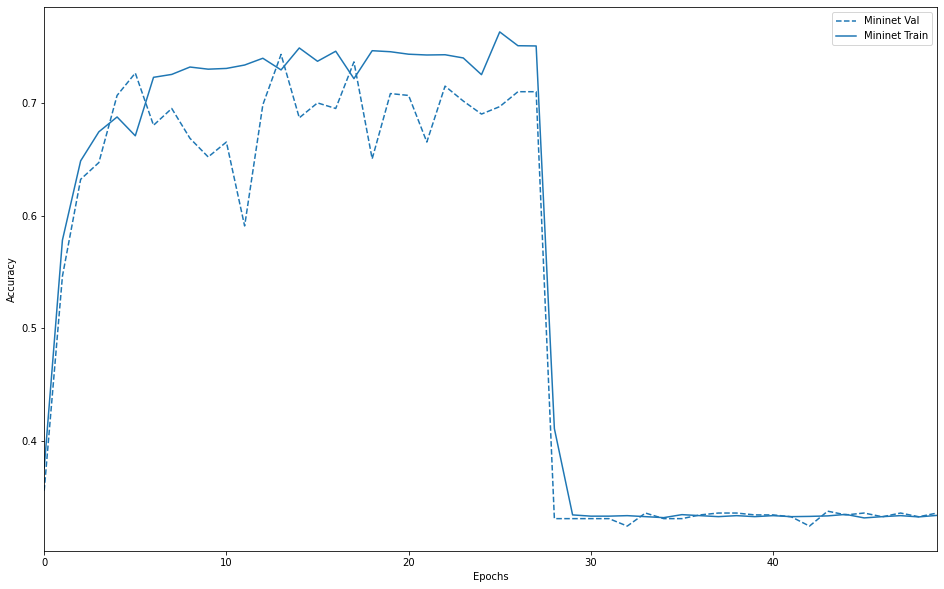

<Figure size 432x288 with 0 Axes>

In [13]:
# 学習曲線を保存
visualization.plot_history('figure_loss.png', [('mininet', history)], key='loss')
visualization.plot_history('figure_accuracy.png', [('mininet', history)], key='accuracy')